<a href="https://colab.research.google.com/github/fred-carneiro/bootcamp-alura/blob/main/AnaliseVacina%C3%A7%C3%A3oNoDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de vacinações realizadas no Distrito Federal

Neste notebook vou analisar os dados referentes à vacinação para o COVID da população do DF. Para isso, estou utilizando os dados coletados no site https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8?inner_span=True no dia 29/05/2021, com os dados atualizados até o dia 28/05/2021.

Para poder entender melhor os dados, existe o dicionário de dados deste mesmo site. Vou colar um print aqui para melhor visualização.

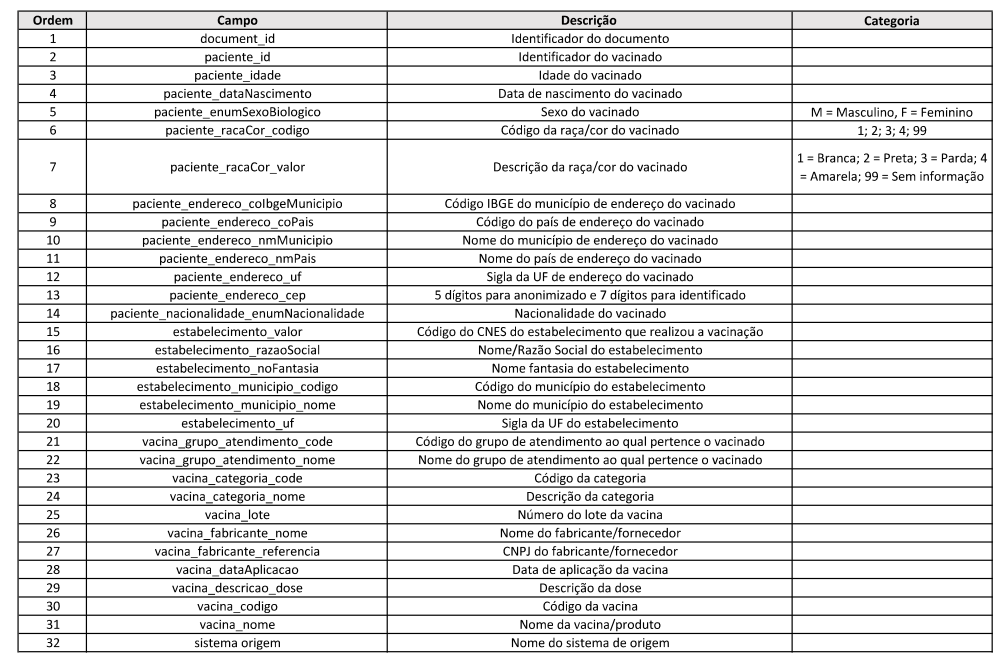

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/drive/MyDrive/BootcampAlura/Projeto 1/vacinacao_covid_df.csv", sep=";")
dados.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,2639c662-401e-471a-989a-159791e498c2-i0b0,39d7cb895b634027b1ce2466d7db990be9b13193a319c0...,46,1974-11-27,F,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71939.0,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,104,Pneumopatias Crônicas Graves,1.0,Comorbidades,210213,FUNDACAO BUTANTAN,Organization/61189445000156,2021-05-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-23T15:01:20.000Z,NaN
1,001ce155-7a49-4e27-b05b-f9938ae9dd35-i0b0,1fa58e38a0c52c1fc9678ee6e597a98e03e4dd70f1397e...,47,1973-07-01,F,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71615.0,B,9578277,GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3,POLICLINICA LAGO SUL,530010,BRASILIA,DF,919,Psicólogo,9.0,Trabalhadores de Saúde,210087,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-05T15:50:40.000Z,NaN
2,3be29250-c085-4356-aa01-9b150101a6fd-i0b0,5ef1e9d425ca69c4799b971209a07a9c1de2290e97f708...,61,1960-04-28,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,NaN,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,213VCD021W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-23T13:51:53.000Z,NaN
3,d6ae7061-cc4c-4cbd-87b3-92986145e306-i0b0,e0693f1db44659a34641f22e6438e9b0ab01e0d569a4b4...,45,1975-09-22,F,4,AMARELA,530010.0,10.0,BRASILIA,BRASIL,DF,NaN,B,11150,UNIDADE BASICA DE SAUDE N 1 ASA SUL,UBS 01 ASA SUL,530010,BRASILIA,DF,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,210013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-25,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-25T15:04:53.000Z,NaN
4,3319fcb8-eaea-48aa-a84b-bbeb280c2d55-i0b0,0e34b8ad90c5d8fa526dc6beaf2d8958c6fd8152d190c6...,39,1981-11-15,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71901.0,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,109,Obesidade Grave (Imc>=40),1.0,Comorbidades,210213,FUNDACAO BUTANTAN,Organization/61189445000156,2021-05-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-23T14:49:55.000Z,NaN


Dando uma olhada nos dados de vacinação, podemos fazer algumas explorações nesses dados.

### Quantidade de vacinas aplicadas

In [2]:
dados['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          506892
Vacina Covid-19 - Covishield                                 288261
Covid-19-AstraZeneca                                          25956
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     15682
Name: vacina_nome, dtype: int64

A tabela acima mostra a quantidade de vacinas aplicadas por tipo de vacina. Chama a atenção a informação da vacina "*Vacina Covid-19 - Covishield*" que segundo o site https://saude.abril.com.br/medicina/tudo-sobre-as-vacinas-contra-a-covid-19-sendo-aplicadas-no-brasil/ é a mesma da AstraZeneca, podendo essas quantidades serem agrupadas.

In [3]:
dados["vacina_nome"] = dados["vacina_nome"].replace("Vacina Covid-19 - Covishield", "Covid-19-AstraZeneca") #agrupando tanto a Covishield
dados['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          506892
Covid-19-AstraZeneca                                         314217
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     15682
Name: vacina_nome, dtype: int64

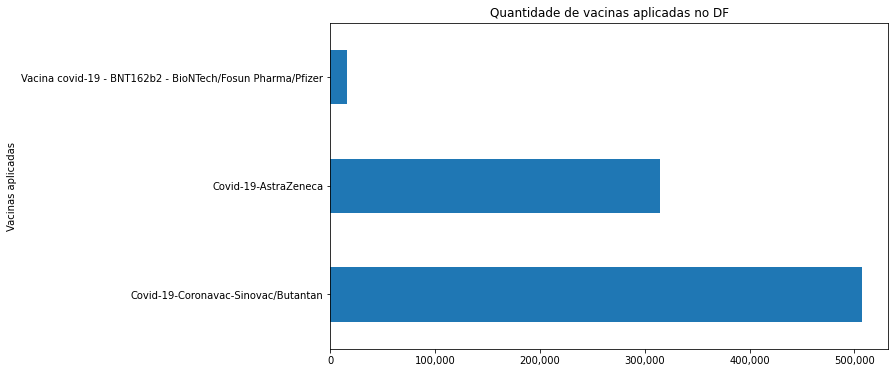

In [18]:
ax = dados['vacina_nome'].value_counts().plot(figsize=(10,6), kind="barh")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylabel('Vacinas aplicadas')
plt.title("Quantidade de vacinas aplicadas no DF")
plt.show()

Nesse gráfico podemos ver que até o momento, as vacinas mais usadas no DF foram as Coronavac e AstraZeneca, com o início do uso das vacinas da Pfizer recentemente.

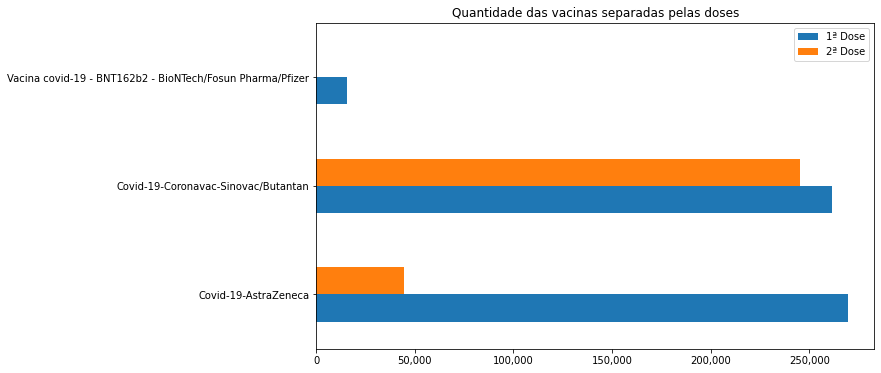

In [64]:
ax = dados.groupby(['vacina_nome','vacina_descricao_dose']) \
  .size().unstack().plot(figsize=(10,6), kind="barh")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylabel('')
ax.set_title("Quantidade das vacinas separadas pelas doses")
ax.legend(["1ª Dose", "2ª Dose"])
plt.show()

Nesse gráfico conseguimos ver que no DF temos uma alta relação de pessoas que voltaram para tomar a segunda dose da Coronavac. 

A segunda dose da AstraZeneca tem uma proporção menor, mas a distância entre as doses é maior (3 semanas da Coronavac e 3 meses da AstraZeneca).

## Aplicação das vacinas no tempo

In [11]:
vacinas_no_tempo = dados.copy()
#Altera o formato da data para ficar com o padrão MM/AAAA
vacinas_no_tempo['vacina_dataaplicacao_mes'] = ["/".join(dt.split('-')[:2][::-1]) for dt in vacinas_no_tempo['vacina_dataaplicacao']] 

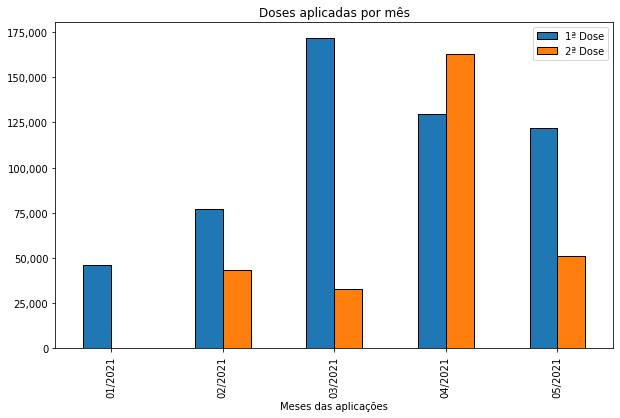

In [14]:
ax = vacinas_no_tempo.groupby(['vacina_dataaplicacao_mes','vacina_descricao_dose']) \
  .size().unstack().plot(figsize=(10,6), kind='bar', edgecolor='black')
plt.xlabel('Meses das aplicações')
ax.set_title("Doses aplicadas por mês")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend(["1ª Dose", "2ª Dose"])
plt.show()

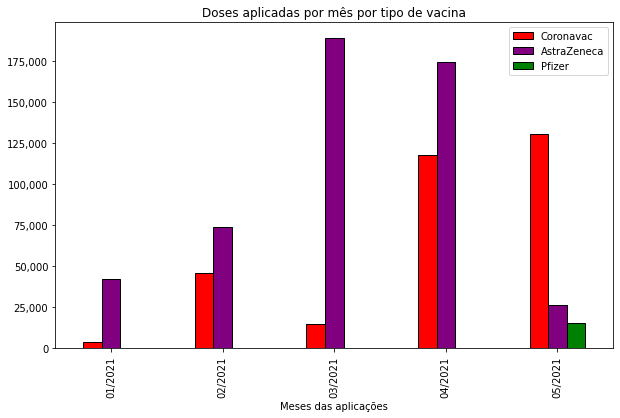

In [24]:
ax = vacinas_no_tempo.groupby(['vacina_dataaplicacao_mes','vacina_nome']) \
  .size().unstack().plot(figsize=(10,6), kind='bar', edgecolor='black', color=["red", "purple", "green"])
plt.xlabel('Meses das aplicações')
ax.set_title("Doses aplicadas por mês por tipo de vacina")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend(["Coronavac", "AstraZeneca", "Pfizer"])
plt.show()

Com esses gráficos, podemos ver que as aplicações das vacinas começaram em janeiro numa quantidade menor e até Março, houve uma crescente na quantidade de vacinas aplicadas. Como podemos acompanhar nos noticiários, em Abril e Maio houve momentos de falta de vacinas, podendo ser a causa  da diminuição da quantidade de vacinas aplicadas nesses meses. 

Os números de Maio tem o impacto de possíveis dados ainda por serem processadas.

Chama a atenção a **chegada da vacina da Pfizer** no mês de maio, aumentando o número de tipos de vacinas disponíveis para a população.

## Vacinas por idade e sexo

Um dos problemas dos dados é que aparentemente possuem erros de cadastros. Analisando os dados abaixo, ordenados por idade, vemos que temos cadastros de pessoas com 121 anos, mas que foram vacinados por serem profissionais da saúde, como médico ou enfermeiras.

In [25]:
vacinas_por_idade = dados.copy()
vacinas_por_idade = vacinas_por_idade.sort_values(by="paciente_idade", ascending=False)


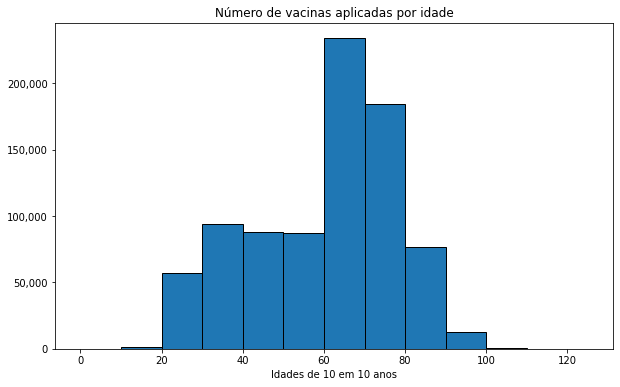

In [28]:
range_idades = [x for x in range(0,125,10)]
range_idades.append(125)
ax = vacinas_por_idade["paciente_idade"].plot(figsize=(10,6), kind='hist', bins=range_idades,
                             edgecolor='black', y="Quantidade de vacinados",
                             title="Número de vacinas aplicadas por idade")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xlabel('Idades de 10 em 10 anos')
plt.ylabel('')
plt.show()

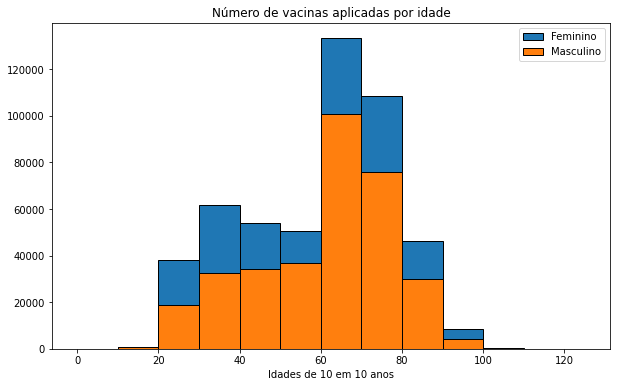

In [35]:
ax = vacinas_por_idade.groupby('paciente_enumsexobiologico')['paciente_idade'].plot(figsize=(10,6), kind='hist', bins=range_idades,
                             edgecolor='black', y="Quantidade de vacinados",
                             title="Número de vacinas aplicadas por idade", legend=True)
plt.xlabel('Idades de 10 em 10 anos')
plt.ylabel('')
plt.legend(["Feminino", "Masculino"])
plt.show()

Podemos notar que a quantidade de vacinas aplicadas por idade ainda é maior na faixa de 60 a 80 anos, já que recentemente foram encerradas as vacinações dos grupos prioritários. No dia 30/05/2021, data da análise, estào sendo vacinados os grupos de casos de comorbidade.

Um dado que chama a atenção é o maior número de vacinas aplicadas as mulheres em relação aos homens

### Vacinas por grupos prioritários

In [62]:
vacinas_por_grupo = dados.copy()
vacinas_por_grupo = vacinas_por_grupo.sort_values(by="vacina_categoria_nome", ascending=False)

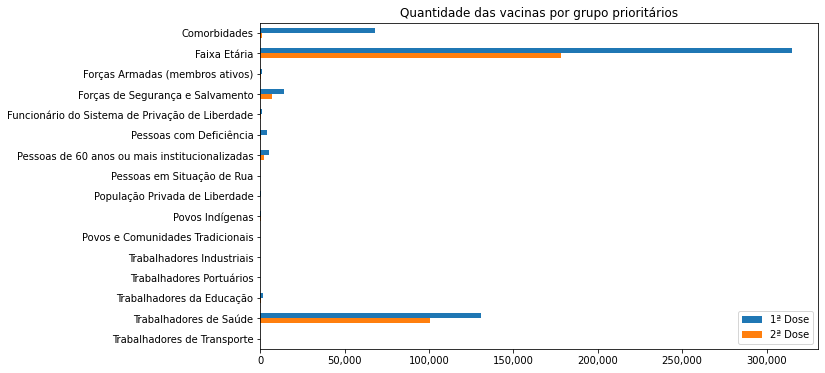

In [76]:
ax = vacinas_por_grupo.groupby(['vacina_categoria_nome','vacina_descricao_dose']) \
  .size().unstack().sort_index(axis=1, ascending=True).plot(figsize=(10,6), kind="barh")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylabel('')
ax.set_title("Quantidade das vacinas por grupo prioritários")
ax.legend(["1ª Dose", "2ª Dose"])
ax.invert_yaxis()
plt.show()

Conforme análises anteriores, ainda temos um maior número de vacinados pela faixa etária e posteriormente pelos trabalhadores da área  de saúde, que estão na linha de frente atendendo os diversos casos dessa pandemia.

## Vacinados vindo de estados fora do DF

In [85]:
dados_estados = dados['paciente_endereco_uf'].value_counts()
df = dados_estados["DF"]
dados_estados_pct = dados_estados/df * 100 #calcula o percentual dos vacinados dos estados em relação ao DF

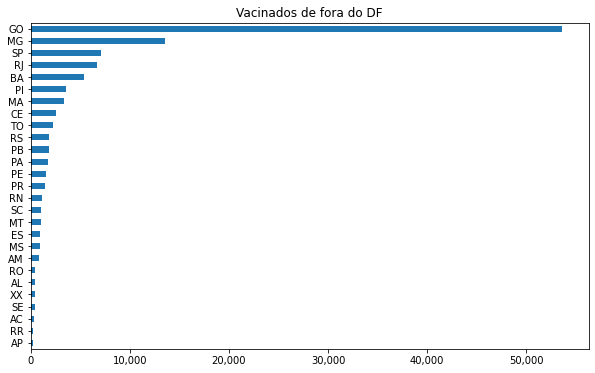

In [75]:
ax = dados_estados.drop("DF").plot(figsize=(10,6), kind="barh", )
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylabel('')
ax.set_title("Vacinados de fora do DF")
ax.invert_yaxis()
plt.show()

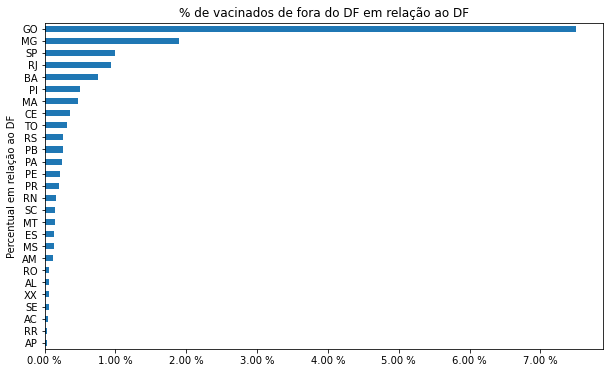

In [84]:
ax = dados_estados_pct.drop("DF").plot(figsize=(10,6), kind="barh", )
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.ylabel('')
plt.ylabel('Percentual em relação ao DF')
ax.set_title("% de vacinados de fora do DF em relação ao DF")
ax.invert_yaxis()
plt.show()

Podemos notar que existe um número relativamente grande de vacinados no DF vindo de outros estados. O número maior do estado do GO provavelmente se dá por terem diversas cidades do GO no entorno do DF. 

Chama a atenção nesses números porque recentemente o governo do DF solicitou ao Ministério da Saúde um número maior de vacinas exatamente por terem muitas pessoas dos estados vizinhos vindo vacinar no DF. Fonte: https://www.agenciabrasilia.df.gov.br/2021/03/30/ministro-da-saude-recebe-pedido-por-mais-doses-de-vacina-para-o-df/